<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/plot25dias_trazalineamaximinimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import yfinance as yf
import pandas as pd
eur=yf.download("EURUSD=X",period="25d",interval="5m").Close
eur.index=pd.DatetimeIndex(eur.index).strftime("%Y-%m-%d")
lista_dias=eur.index.unique()
dia=[]
for x in range(len(lista_dias)):
    dia.append(eur.loc[lista_dias[x]])

[*********************100%***********************]  1 of 1 completed


In [ ]:
nuevo_dia=[] #contiene los dataframes con indices en cada dataframe de la lista dia
for y in dia:
  nuevo_dia.append(y.reset_index())

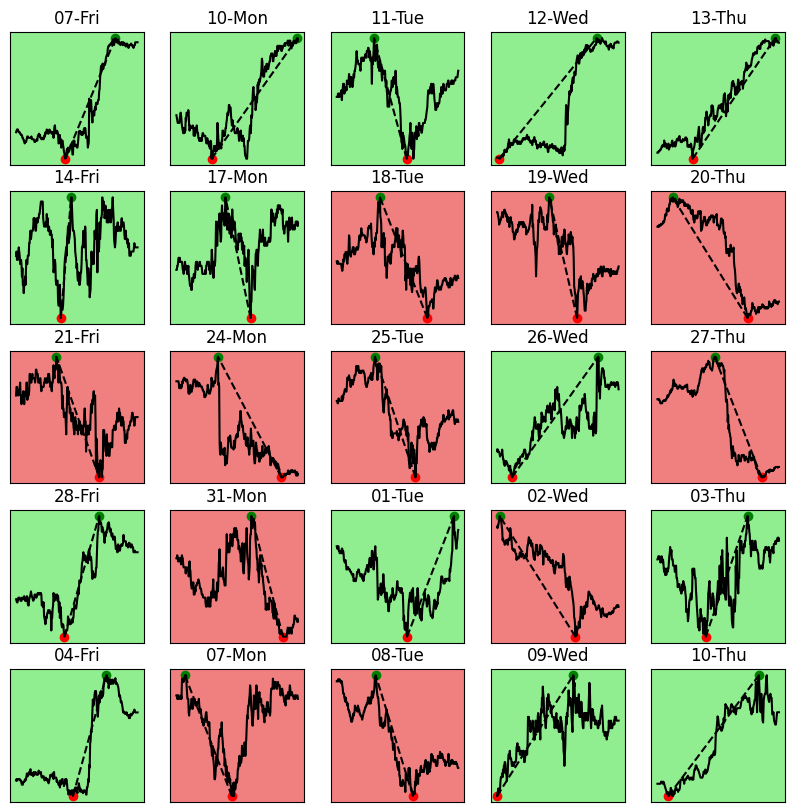

In [ ]:
mensual=figure(figsize=(10,10))
lista_maximos,lista_minimos,lista_promedios,lista_aperturas=[],[],[],[]
for i in range(0,25):
  aperturas=nuevo_dia[i].Close[0]
  min_indices = nuevo_dia[i].Close.idxmin()
  max_indices = nuevo_dia[i].Close.idxmax()


  min_values = nuevo_dia[i].Close.min()
  max_values = nuevo_dia[i].Close.max()

  if nuevo_dia[i].Close[0]<nuevo_dia[i].Close[len(nuevo_dia[i])-1]:
    color_fondo="lightgreen"
  else:
    color_fondo="lightcoral"

  subplot(5,5,i+1,frameon=True,xticks=[],yticks=[],facecolor=color_fondo)
  plot(nuevo_dia[i].Close.values,color="k")
  title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"))

  # text(0,aperturas,"%.3f"%aperturas,color="g",ha="right") #PROMEDIO DEL DIA

  scatter(min_indices, min_values, color='red', label='Mínimos')
  scatter(max_indices, max_values, color='green', label='Máximos')
  plot([min_indices, max_indices], [min_values, max_values], color='black', linestyle='dashed', label='Línea de mínimos y máximos')

